### Using Random Forest to perform Machine Learning
---

In [184]:
# importing libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [241]:
# Load the dataset into a pandas dataframe
cleanedMusicData = pd.read_csv('../Data/tracks_cleaned.csv')
cleanedMusicData.drop('release_date',axis=1,inplace=True)
cleanedMusicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469281 entries, 0 to 469280
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        469281 non-null  int64  
 1   duration_ms       469281 non-null  int64  
 2   explicit          469281 non-null  int64  
 3   danceability      469281 non-null  float64
 4   energy            469281 non-null  float64
 5   key               469281 non-null  int64  
 6   loudness          469281 non-null  float64
 7   mode              469281 non-null  int64  
 8   speechiness       469281 non-null  float64
 9   acousticness      469281 non-null  float64
 10  instrumentalness  469281 non-null  float64
 11  liveness          469281 non-null  float64
 12  valence           469281 non-null  float64
 13  tempo             469281 non-null  float64
 14  time_signature    469281 non-null  int64  
 15  num_artists       469281 non-null  int64  
 16  year              46

---
Our objective is to figure out whether a song is popular or not rather than assigning it a value of popularity. Hence, we would bin the values of popularity

In [242]:
# binning
# pd.cut(cleanedMusicData['popularity'],bins=5)
pd.cut(cleanedMusicData['popularity'],bins=4)

0         (-0.098, 24.5]
1         (-0.098, 24.5]
2         (-0.098, 24.5]
3         (-0.098, 24.5]
4         (-0.098, 24.5]
               ...      
469276      (73.5, 98.0]
469277      (73.5, 98.0]
469278      (73.5, 98.0]
469279      (73.5, 98.0]
469280      (73.5, 98.0]
Name: popularity, Length: 469281, dtype: category
Categories (4, interval[float64, right]): [(-0.098, 24.5] < (24.5, 49.0] < (49.0, 73.5] < (73.5, 98.0]]

In [243]:
# cleanedMusicData['popularity']=pd.cut(cleanedMusicData['popularity'],bins=5, labels =["very low","low","average","high","very high"], right = True)
cleanedMusicData['popularity']=pd.cut(cleanedMusicData['popularity'],bins=4, labels =["low","below_average","above_average","high"], right = True)

In [244]:
y = cleanedMusicData.popularity
y.value_counts()/y.count()

low              0.451751
below_average    0.418785
above_average    0.123237
high             0.006227
Name: popularity, dtype: float64

Popularity of the music should not be measured across its release date. Hence, we should remove it. Furthemore, We notice the uneven count distribution across the 5 bins. Thus we need to resample the classes

In [245]:
# Removing Release Year
cleanedMusicData.drop('year',axis=1,inplace=True)
cleanedMusicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469281 entries, 0 to 469280
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   popularity        469281 non-null  category
 1   duration_ms       469281 non-null  int64   
 2   explicit          469281 non-null  int64   
 3   danceability      469281 non-null  float64 
 4   energy            469281 non-null  float64 
 5   key               469281 non-null  int64   
 6   loudness          469281 non-null  float64 
 7   mode              469281 non-null  int64   
 8   speechiness       469281 non-null  float64 
 9   acousticness      469281 non-null  float64 
 10  instrumentalness  469281 non-null  float64 
 11  liveness          469281 non-null  float64 
 12  valence           469281 non-null  float64 
 13  tempo             469281 non-null  float64 
 14  time_signature    469281 non-null  int64   
 15  num_artists       469281 non-null  int64   
dtypes:

In [246]:
pop_count = cleanedMusicData.popularity.value_counts()

In [247]:
x= pd.DataFrame(cleanedMusicData.drop('popularity',axis=1))
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469281 entries, 0 to 469280
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_ms       469281 non-null  int64  
 1   explicit          469281 non-null  int64  
 2   danceability      469281 non-null  float64
 3   energy            469281 non-null  float64
 4   key               469281 non-null  int64  
 5   loudness          469281 non-null  float64
 6   mode              469281 non-null  int64  
 7   speechiness       469281 non-null  float64
 8   acousticness      469281 non-null  float64
 9   instrumentalness  469281 non-null  float64
 10  liveness          469281 non-null  float64
 11  valence           469281 non-null  float64
 12  tempo             469281 non-null  float64
 13  time_signature    469281 non-null  int64  
 14  num_artists       469281 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 53.7 MB


In [248]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(x,y)

print('Removed Indexes:')
print(X_ros.shape,y_ros.shape)

Removed Indexes:
(847992, 15) (847992,)


In [249]:
y_ros.value_counts()

low              211998
below_average    211998
above_average    211998
high             211998
Name: popularity, dtype: int64

In [250]:
X_ros.value_counts()

duration_ms  explicit  danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence  tempo    time_signature  num_artists
126521       0         0.719         0.598   9    -6.254    1     0.0770       0.232000      0.000000          0.1150    0.303    142.592  4               1              222
203064       0         0.702         0.825   6    -3.787    0     0.0601       0.008830      0.000000          0.0674    0.915    102.977  4               2              190
176561       0         0.723         0.809   7    -3.081    0     0.0625       0.003460      0.001230          0.5650    0.274    98.007   4               3              173
238805       0         0.761         0.525   11   -6.900    1     0.0944       0.440000      0.000007          0.0921    0.531    80.870   4               1              165
230120       0         0.620         0.832   10   -4.848    1     0.0360       0.332000      0.000000          0.1040    0.481    144.926

In [251]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.2)

In [252]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 500,  # n_estimators denote number of trees
                                 max_depth = 12)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.ravel())

RandomForestClassifier(max_depth=12, n_estimators=500)

Train Data
Accuracy  :	 0.6155149006549301

TPR Train :	 0.6487093550754756
TNR Train :	 0.6883368344141018

FPR Train :	 0.31166316558589824
FNR Train :	 0.35129064492452444


<Axes: >

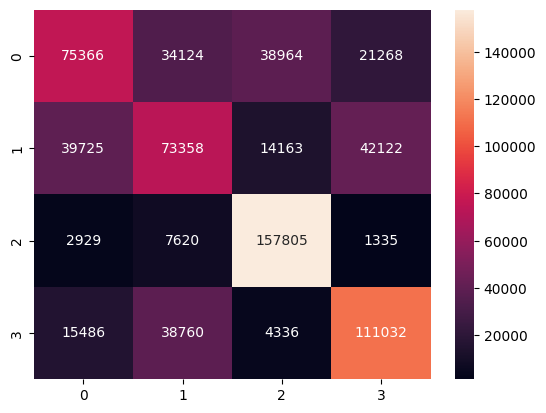

In [253]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f")

Test Data
Accuracy  :	 0.6015955282755205

TPR Test :	 0.623500340221323
TNR Test :	 0.678040440083259

FPR Test :	 0.321959559916741
FNR Test :	 0.37649965977867705


<Axes: >

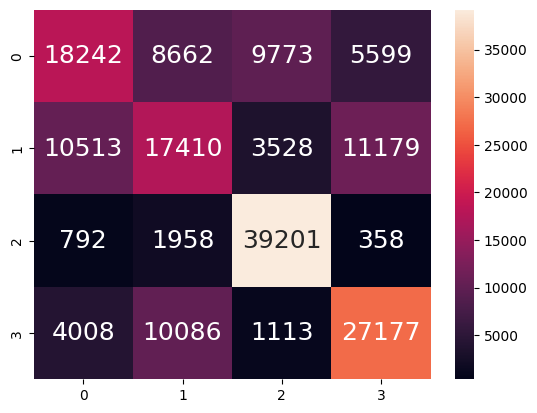

In [254]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [255]:
# calculating f1 score
from sklearn.metrics import f1_score

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Calculate the F1 Score
f1_train = f1_score(y_train, y_train_pred, average='weighted')

print("F1 Score (Train):\t", f1_train)


F1 Score (Train):	 0.603518053157271


In [256]:
# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Calculate the F1 Score
f1_train = f1_score(y_test, y_test_pred, average='weighted')

print("F1 Score (Test):\t", f1_train)


F1 Score (Test):	 0.5888958078450226


---
Based on our EDA Analysis we determined some attributes are negligible.Let's remove them.

In [211]:
cleanedMusicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469281 entries, 0 to 469280
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   popularity        469281 non-null  category
 1   duration_ms       469281 non-null  int64   
 2   explicit          469281 non-null  int64   
 3   danceability      469281 non-null  float64 
 4   energy            469281 non-null  float64 
 5   key               469281 non-null  int64   
 6   loudness          469281 non-null  float64 
 7   mode              469281 non-null  int64   
 8   speechiness       469281 non-null  float64 
 9   acousticness      469281 non-null  float64 
 10  instrumentalness  469281 non-null  float64 
 11  liveness          469281 non-null  float64 
 12  valence           469281 non-null  float64 
 13  tempo             469281 non-null  float64 
 14  time_signature    469281 non-null  int64   
 15  num_artists       469281 non-null  int64   
 16  ye

In [232]:
refinedMusicData = pd.DataFrame(cleanedMusicData)
refinedMusicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469281 entries, 0 to 469280
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   popularity        469281 non-null  category
 1   duration_ms       469281 non-null  int64   
 2   explicit          469281 non-null  int64   
 3   danceability      469281 non-null  float64 
 4   energy            469281 non-null  float64 
 5   key               469281 non-null  int64   
 6   loudness          469281 non-null  float64 
 7   mode              469281 non-null  int64   
 8   speechiness       469281 non-null  float64 
 9   acousticness      469281 non-null  float64 
 10  instrumentalness  469281 non-null  float64 
 11  liveness          469281 non-null  float64 
 12  valence           469281 non-null  float64 
 13  tempo             469281 non-null  float64 
 14  time_signature    469281 non-null  int64   
 15  num_artists       469281 non-null  int64   
 16  ye

In [233]:
# removing irrelevant data
refinedMusicData.drop(['year','num_artists','key','mode','speechiness','liveness','valence','tempo','time_signature'],axis=1,inplace=True)
refinedMusicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469281 entries, 0 to 469280
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   popularity        469281 non-null  category
 1   duration_ms       469281 non-null  int64   
 2   explicit          469281 non-null  int64   
 3   danceability      469281 non-null  float64 
 4   energy            469281 non-null  float64 
 5   loudness          469281 non-null  float64 
 6   acousticness      469281 non-null  float64 
 7   instrumentalness  469281 non-null  float64 
dtypes: category(1), float64(5), int64(2)
memory usage: 25.5 MB


In [225]:
y_clean= refinedMusicData.popularity
y_clean.value_counts()/y_clean.count()

low              0.451751
below_average    0.418785
above_average    0.123237
high             0.006227
Name: popularity, dtype: float64

In [226]:
pop_count = refinedMusicData.popularity.value_counts()
x_clean= pd.DataFrame(refinedMusicData.drop('popularity',axis=1))
x_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469281 entries, 0 to 469280
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_ms       469281 non-null  int64  
 1   explicit          469281 non-null  int64  
 2   danceability      469281 non-null  float64
 3   energy            469281 non-null  float64
 4   loudness          469281 non-null  float64
 5   mode              469281 non-null  int64  
 6   acousticness      469281 non-null  float64
 7   instrumentalness  469281 non-null  float64
 8   valence           469281 non-null  float64
 9   tempo             469281 non-null  float64
 10  num_artists       469281 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 39.4 MB


In [227]:
ros = RandomOverSampler()
X_ros_clean, y_ros_clean = ros.fit_resample(x_clean,y_clean)

print('Removed Indexes:')
print(X_ros_clean.shape,y_ros_clean.shape)

Removed Indexes:
(847992, 11) (847992,)


In [228]:
y_ros_clean.value_counts()

low              211998
below_average    211998
above_average    211998
high             211998
Name: popularity, dtype: int64

In [218]:
X_ros_clean.value_counts()

duration_ms  explicit  danceability  energy  loudness  acousticness  instrumentalness
203064       0         0.702         0.825   -3.787    0.00883       0.000000            213
126521       0         0.719         0.598   -6.254    0.23200       0.000000            205
221820       0         0.730         0.729   -3.434    0.16700       0.000001            205
235545       1         0.851         0.541   -6.825    0.56800       0.000000            171
242680       0         0.719         0.847   -6.340    0.00201       0.020400            167
                                                                                        ... 
191707       0         0.531         0.458   -10.896   0.61600       0.000223              1
                       0.507         0.193   -16.440   0.98000       0.159000              1
                       0.498         0.890   -5.181    0.00371       0.000000              1
                       0.466         0.218   -13.088   0.87500       0.000436

In [229]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_ros_clean, y_ros_clean, test_size = 0.2)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 10)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.ravel())

RandomForestClassifier(max_depth=10)

Train Data
Accuracy  :	 0.5426706938308621

TPR Train :	 0.6550500376832886
TNR Train :	 0.5895198821172255

FPR Train :	 0.4104801178827745
FNR Train :	 0.3449499623167113


<Axes: >

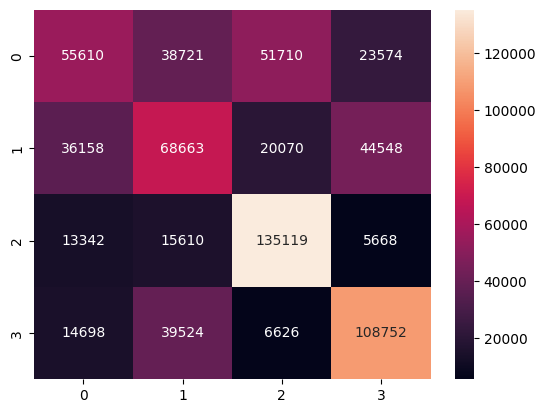

In [230]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f")

---
Given the accuracy results, let's add some cross validation to see if results improve

In [234]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.2)

In [236]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(10, 16)}             # depth of trees 10, 11, ..., 20

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.ravel())

KeyboardInterrupt: 

In [ ]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))